In [1]:
import math
import pandas as pd
import numpy as np
import scipy
import random

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 15, 5


# Task 1-2
My birthday is 18.09.2002

               dd.mm.yyyy

In [2]:
a = np.array([1, (1+8)/140, (0-8)/140, 0, 1/150, (0-1)/150])
b = np.array([0/10, (0-8)/20, (9-0)/20, 2/30, 8/20, 9/20])
print(f"{a=}\n {b=}")

a=array([ 1.        ,  0.06428571, -0.05714286,  0.        ,  0.00666667,
       -0.00666667])
 b=array([ 0.        , -0.4       ,  0.45      ,  0.06666667,  0.4       ,
        0.45      ])


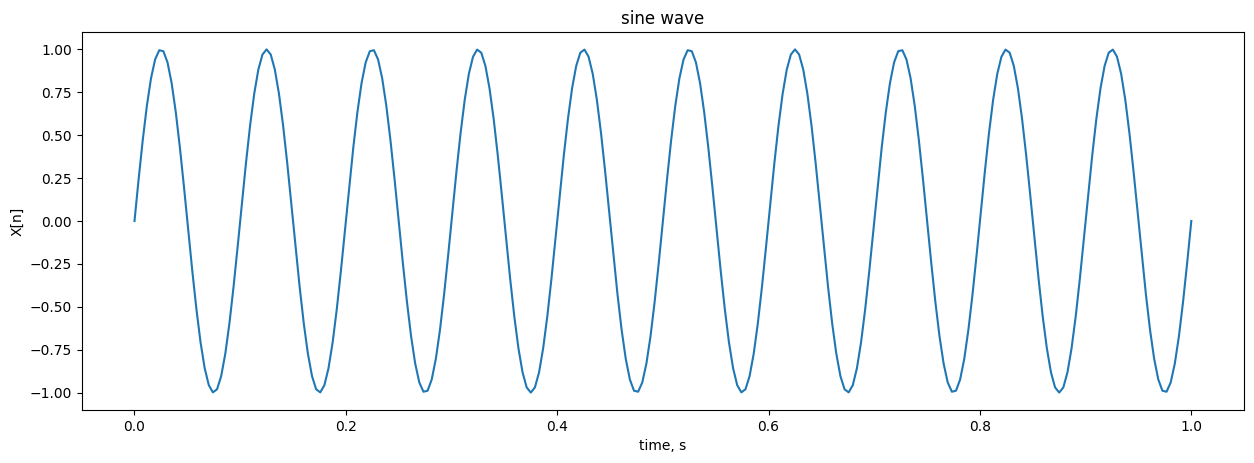

In [3]:
fq = 10
timestamps = np.arange(0, 1+1/256, 1/256)
sin_10hz = np.sin(fq*timestamps*2*math.pi)
plt.plot(timestamps, sin_10hz)
plt.title("sine wave")
plt.xlabel("time, s")
plt.ylabel("X[n]")
plt.show()

In [4]:
from scipy.signal import lfilter, lfilter_zi
zero_init = [0 for i in range(max(len(a), len(b)) - 1)]
zero_output = lfilter(b, a, sin_10hz, zi=zero_init)

# random values from -1 to 1
random_init = [(random.random()-0.5) * 2 for _ in range(max(len(a), len(b)) - 1)]
random_output = lfilter(b, a, sin_10hz, zi=random_init)

C:\Users\M84200~1\AppData\Local\Temp/ipykernel_24608/3464899308.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(timestamps, random_output[0], "bo",
C:\Users\M84200~1\AppData\Local\Temp/ipykernel_24608/3464899308.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(timestamps, zero_output[0], "bo",


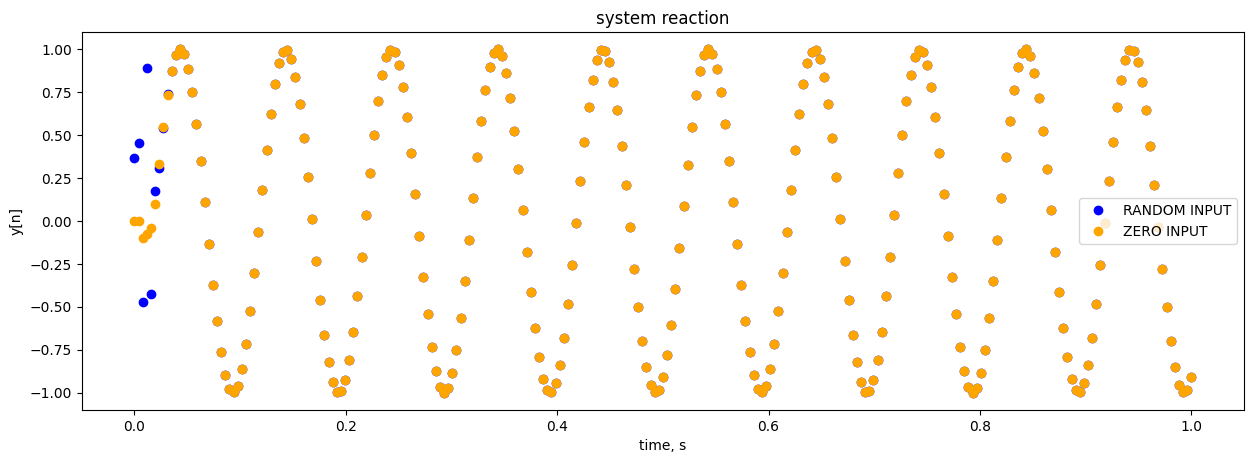

In [5]:
fig, ax = plt.subplots()
ax.plot(timestamps, random_output[0], "bo",
        color="blue", 
        linewidth=1,
        label="RANDOM INPUT")

ax.plot(timestamps, zero_output[0], "bo",
        color="orange", 
        linewidth=1,
        label="ZERO INPUT")
ax.legend()
ax.set_title("system reaction")

plt.ylabel("y[n]")
plt.xlabel("time, s")
plt.show()

C:\Users\M84200~1\AppData\Local\Temp/ipykernel_24608/3466201112.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(timestamps[:first_100_idx], random_output[0][:first_100_idx], "bo",
C:\Users\M84200~1\AppData\Local\Temp/ipykernel_24608/3466201112.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(timestamps[:first_100_idx], zero_output[0][:first_100_idx], "bo",


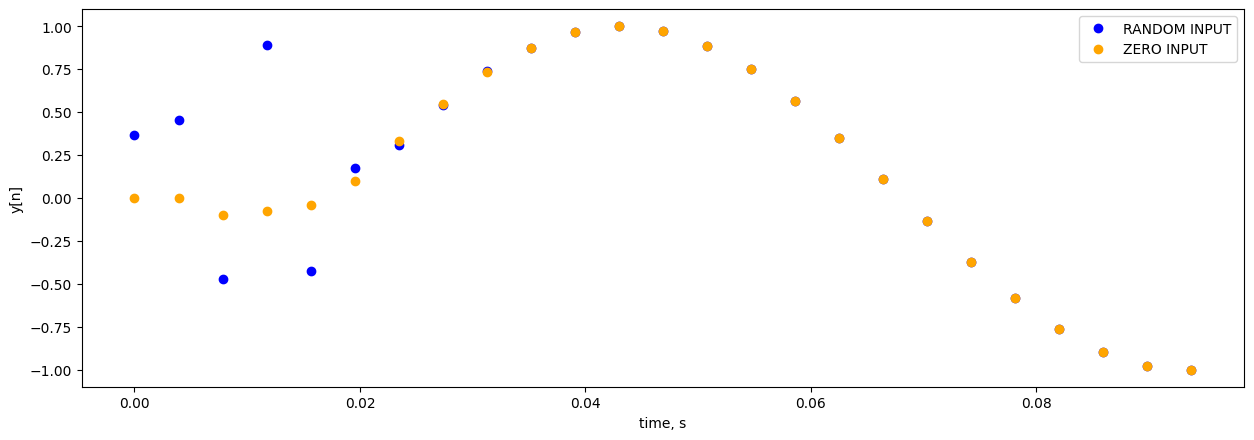

In [6]:
first_100_idx = len(timestamps) // 10
fig, ax = plt.subplots()
ax.plot(timestamps[:first_100_idx], random_output[0][:first_100_idx], "bo",
        color="blue", 
        linewidth=1,
        label="RANDOM INPUT")

ax.plot(timestamps[:first_100_idx], zero_output[0][:first_100_idx], "bo",
        color="orange", 
        linewidth=1,
        label="ZERO INPUT")
ax.legend()

plt.ylabel("y[n]")
plt.xlabel("time, s")
plt.show()

#### random input did sth bad to our signal at the beginning, but then it normalized with zero input

# Task 3

In [7]:
from scipy.signal import find_peaks
def coeffs_diff(ipt, outpt, fs):
    # looking for peaks:
    ipt_peaks, _ = find_peaks(ipt)
    outpt_peaks, _ = find_peaks(outpt)
    idx = len(ipt_peaks) - 1
    # divide idx of one peak by another:
    coefficient = outpt[outpt_peaks[idx]] / ipt[ipt_peaks[idx]]

    # absolute differense:
    delpa_phi_idx = outpt_peaks[idx] - ipt_peaks[idx]
    delta = abs(delpa_phi_idx) / (1/fs)
    return delta, coefficient

delta, coefficient = coeffs_diff(sin_10hz, zero_output[0], 256)
delta, coefficient

(1024.0, 0.9943359649333587)

# task 4

In [8]:
sin_3hz = np.sin(3*timestamps*2*math.pi)
sin_20hz = np.sin(20*timestamps*2*math.pi)

output_3hz = lfilter(b, a, sin_3hz, zi=zero_init)[0]
output_20hz = lfilter(b, a, sin_20hz, zi=zero_init)[0]

additive = sin_3hz + sin_20hz
additive_response = lfilter(b, a, additive, zi=zero_init)[0]

just_sum = output_3hz + output_20hz

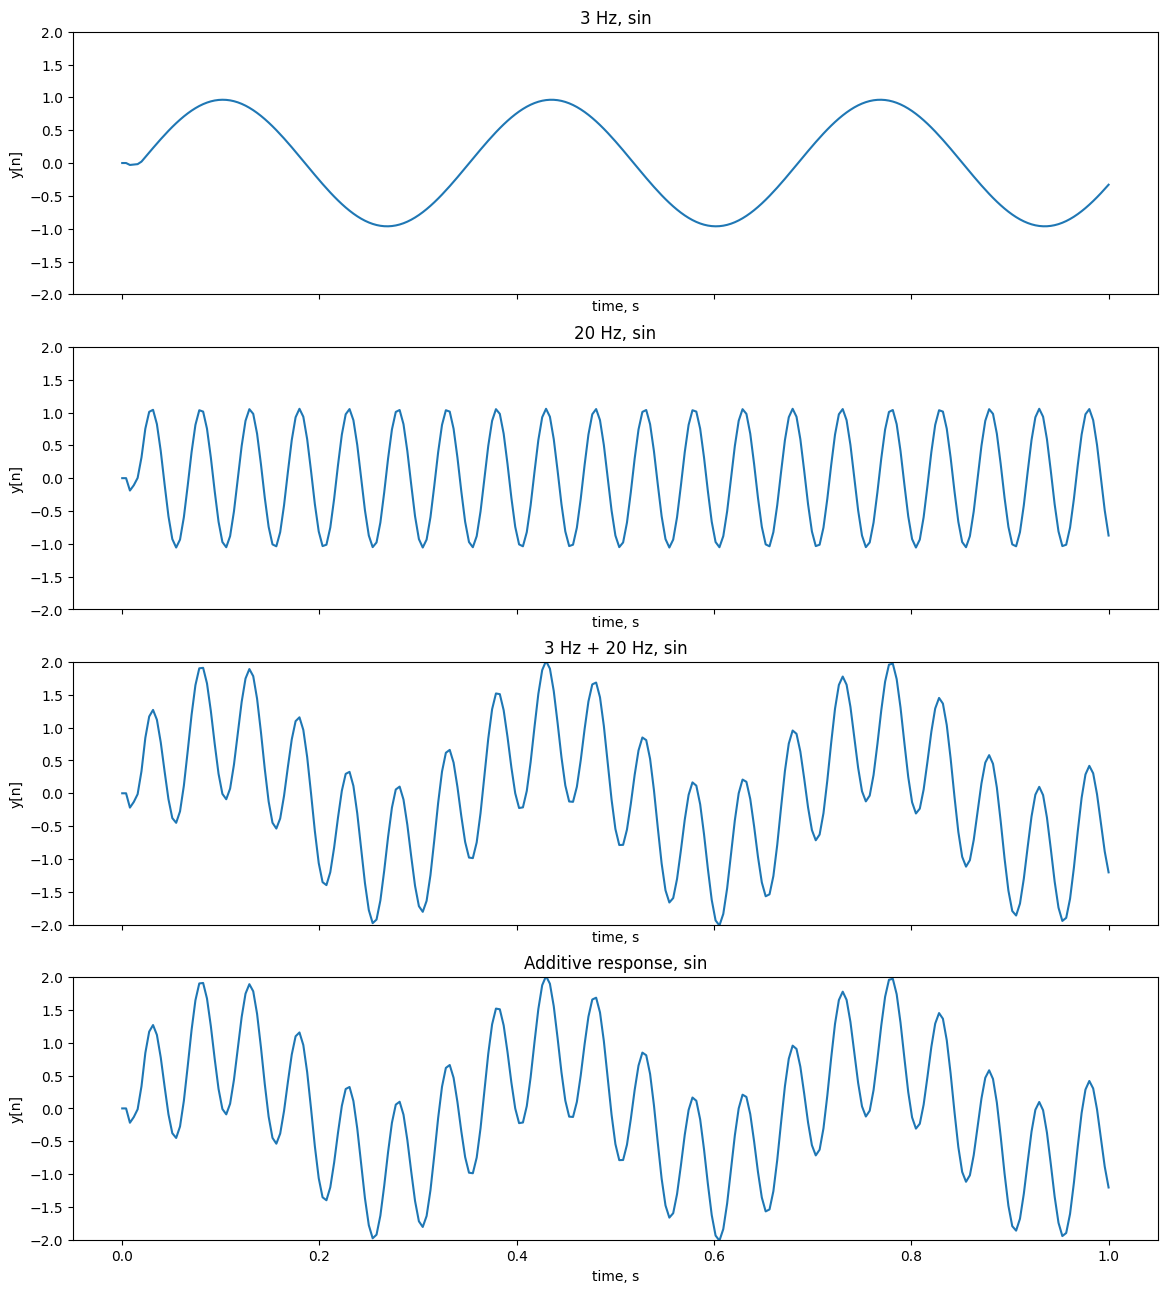

In [9]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 16), sharex=True)

ax1.plot(timestamps, output_3hz)
ax1.set_ylabel("y[n]")
ax1.set_xlabel("time, s")
ax1.set_title("3 Hz, sin")
ax1.set_ylim(ymin=-2, ymax=2)


ax2.plot(timestamps, output_20hz)
ax2.set_ylim(ymin=-2, ymax=2)
ax2.set_xlabel("time, s")
ax2.set_ylabel("y[n]")
ax2.set_title("20 Hz, sin")

ax3.plot(timestamps, just_sum)
ax3.set_ylabel("y[n]")
ax3.set_xlabel("time, s")
ax3.set_title("3 Hz + 20 Hz, sin")
ax3.set_ylim(ymin=-2, ymax=2)

ax4.plot(timestamps, additive_response)
ax4.set_ylabel("y[n]")
ax4.set_xlabel("time, s")
ax4.set_title("Additive response, sin")
ax4.set_ylim(ymin=-2, ymax=2)

plt.show()

 # task 5

Text(0, 0.5, 'impulse value')

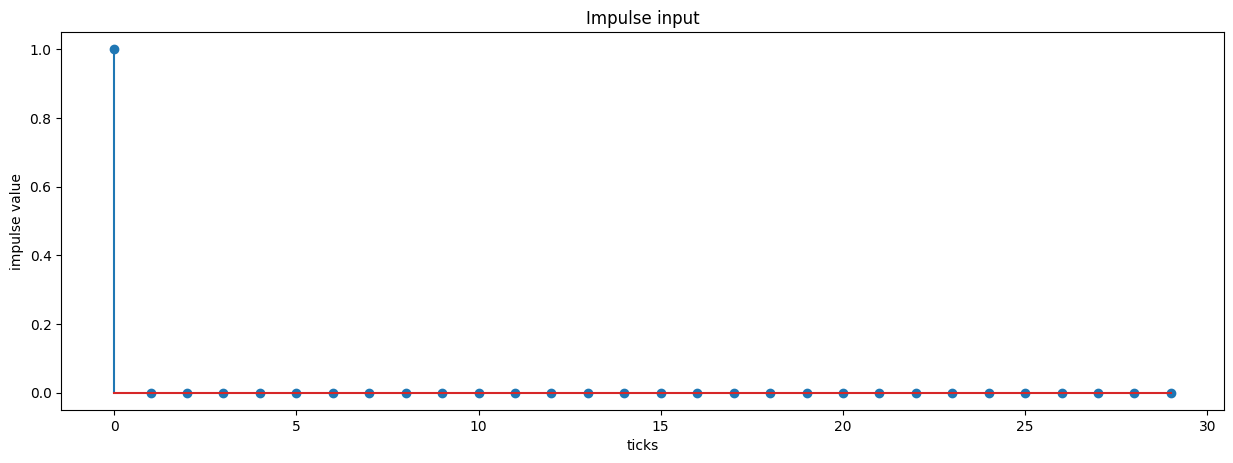

In [10]:
from scipy.signal import unit_impulse

impulse = unit_impulse(30)
h_n = lfilter(b, a, impulse, zi=zero_init)[0]
plt.stem([i for i in range(30)], impulse)
plt.title("Impulse input")
plt.xlabel("ticks")
plt.ylabel("impulse value")

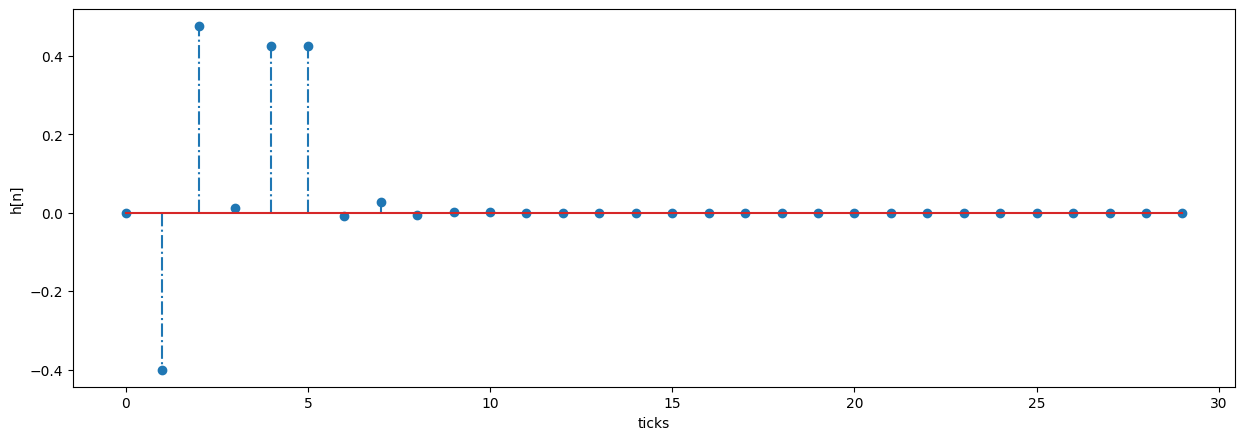

In [11]:
plt.stem([i for i in range(30)], h_n, "-.")
plt.xlabel("ticks")
plt.ylabel("h[n]")
plt.show()

# task 6

C:\Users\m84200118\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\filter_design.py:1631: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


<StemContainer object of 3 artists>

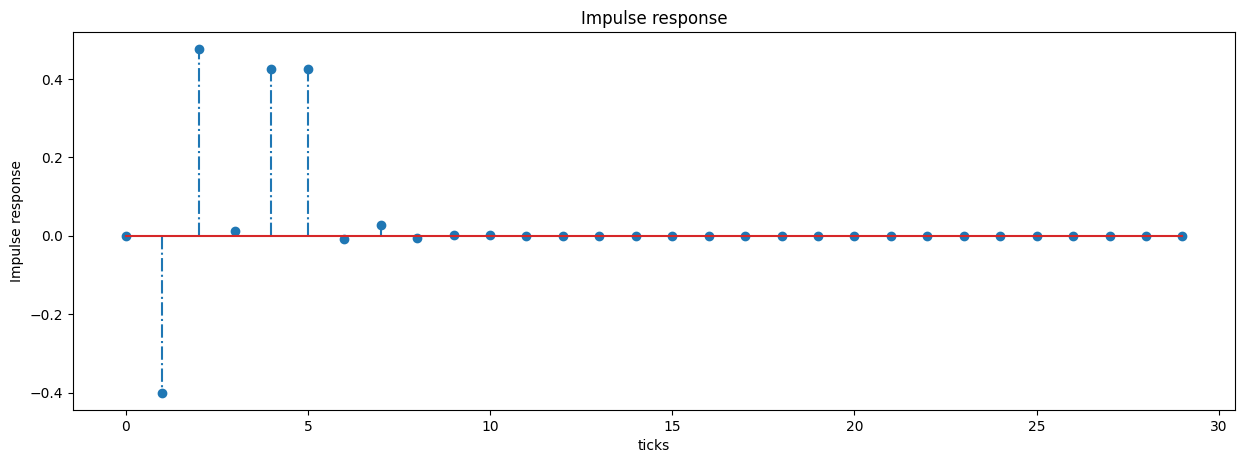

In [12]:
from scipy.signal import TransferFunction
from scipy.signal import dimpulse
from scipy import signal
x = TransferFunction(b, a).impulse()[1]

impulse_response = signal.dlti(b, a, dt=1/256).impulse()[1][0]
plt.title("Impulse response")
plt.ylabel("Impulse response")
plt.xlabel("ticks")
plt.stem([i for i in range(30)], impulse_response[:30], "-.")


In [13]:
impulse_100 = unit_impulse(100)
h_n_100 = lfilter(b, a, impulse_100, zi=zero_init)[0]


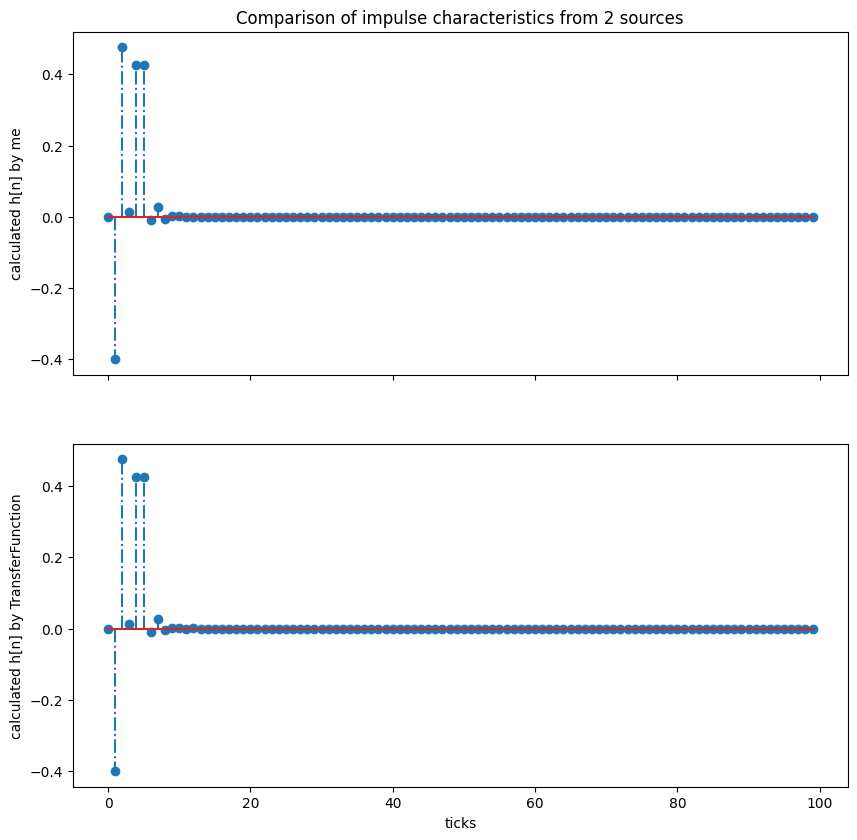

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
ax1.stem([i for i in range(100)], h_n_100, "-.")
ax1.set_ylabel("calculated h[n] by me")
ax1.set_title("Comparison of impulse characteristics from 2 sources")
ax2.stem([i for i in range(100)], impulse_response, "-.")
ax2.set_ylabel("calculated h[n] by TransferFunction")
ax2.set_xlabel("ticks")
plt.show()

# task 7

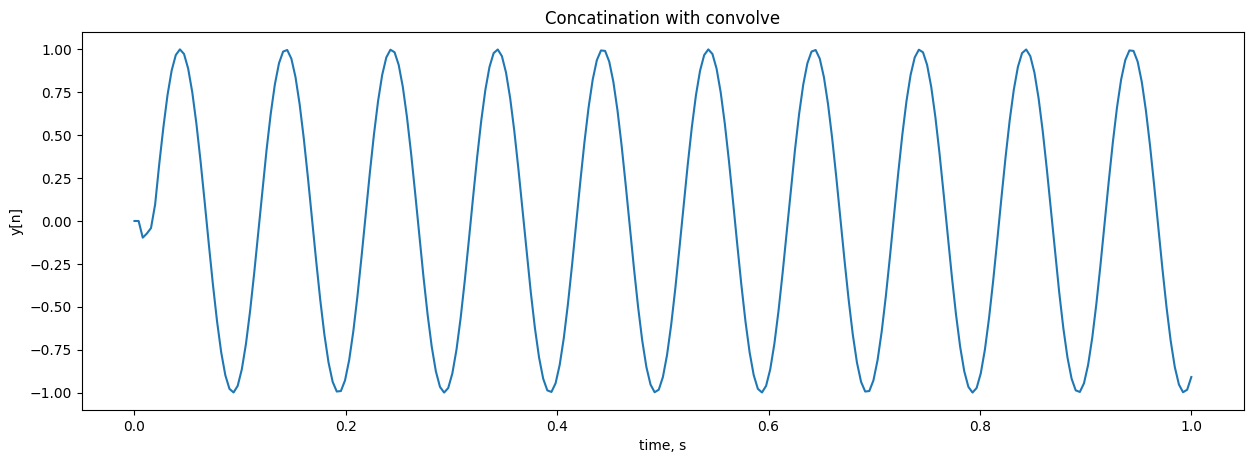

In [15]:
zero_ipt = np.concatenate((np.array(zero_init), sin_10hz))

filtered = signal.convolve(sin_10hz, h_n)
plt.plot(timestamps, filtered[:len(timestamps)])
plt.title("Concatination with convolve")
plt.ylabel("y[n]")
plt.xlabel("time, s")
plt.show()

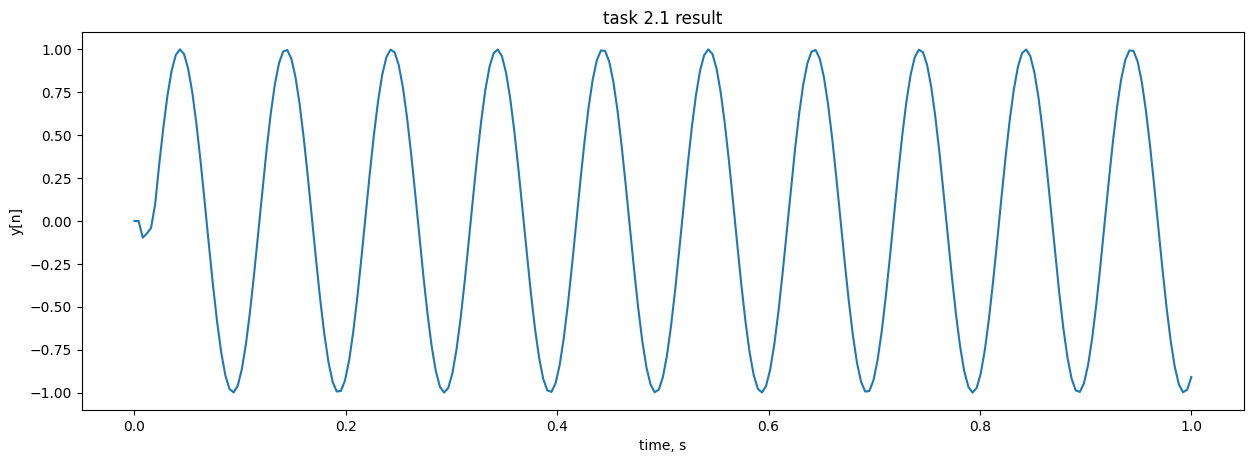

In [16]:
plt.plot(timestamps, zero_output[0])
plt.title("task 2.1 result")
plt.ylabel("y[n]")
plt.xlabel("time, s")
plt.show()

In [17]:
# Висновок: конкатенація матриць інпуту і характеристика дало той же результат

# task 8

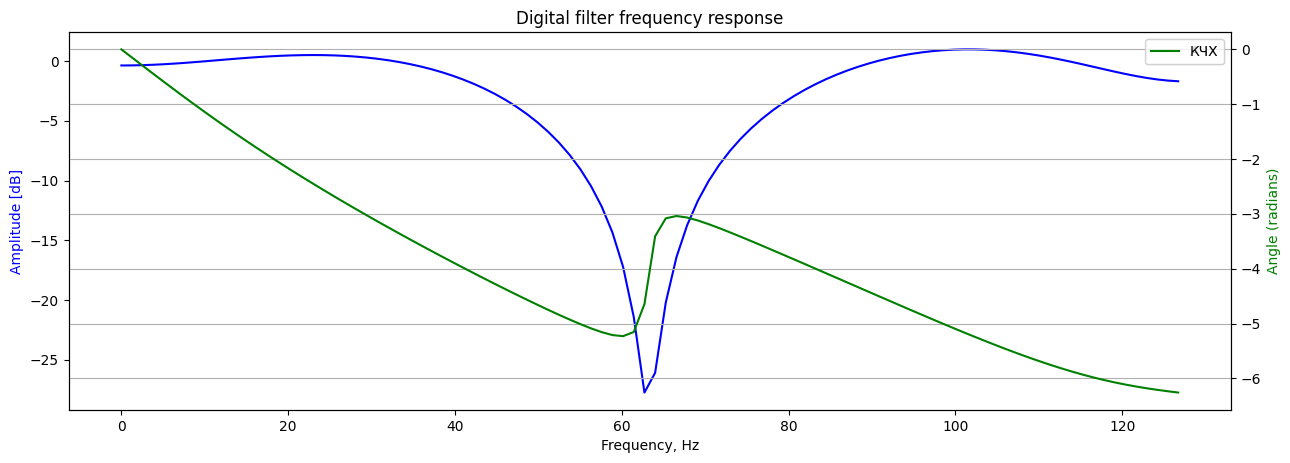

In [24]:
from scipy.signal import freqz
w, h_freq = freqz(b, a, 100, fs=256)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h_freq)), 'b', label="АЧХ")
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency, Hz')

ax2 = ax1.twinx()

angles = np.unwrap(np.angle(h_freq))
ax2.plot(w, angles, 'g', label="КЧХ")
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')

ax1.legend()
ax2.legend()
plt.show()


# Task 9

In [19]:
from scipy.signal import lfilter, freqz

freq = 256
w, h = freqz(b, a, worN=freq)
afc = abs(h)
# afc[afc > 1], np.nonzero(afc > 1) # ??????????????
# ????????????
len(afc), len(afc[afc > 1]), afc[afc > 1]

(256,
 91,
 array([1.00264494, 1.00602765, 1.00943199, 1.01284318, 1.01624642,
        1.01962693, 1.02297004, 1.02626117, 1.02948592, 1.03263002,
        1.03567946, 1.03862044, 1.0414394 , 1.04412309, 1.0466585 ,
        1.04903296, 1.05123411, 1.05324991, 1.05506864, 1.05667894,
        1.05806978, 1.05923049, 1.06015073, 1.06082055, 1.06123031,
        1.06137075, 1.06123296, 1.06080837, 1.06008879, 1.05906636,
        1.05773357, 1.05608326, 1.05410863, 1.05180321, 1.04916091,
        1.04617593, 1.04284288, 1.03915666, 1.03511255, 1.03070616,
        1.02593345, 1.02079073, 1.01527466, 1.00938224, 1.00311082,
        1.00876592, 1.01889595, 1.02858603, 1.0378285 , 1.04661596,
        1.0549413 , 1.06279775, 1.0701789 , 1.07707873, 1.08349169,
        1.08941266, 1.09483707, 1.09976089, 1.10418066, 1.10809357,
        1.11149746, 1.11439087, 1.11677307, 1.11864409, 1.12000479,
        1.12085681, 1.1212027 , 1.12104586, 1.12039063, 1.11924228,
        1.11760702, 1.11549206, 1.112

# Task 10

C:\Users\m84200118\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


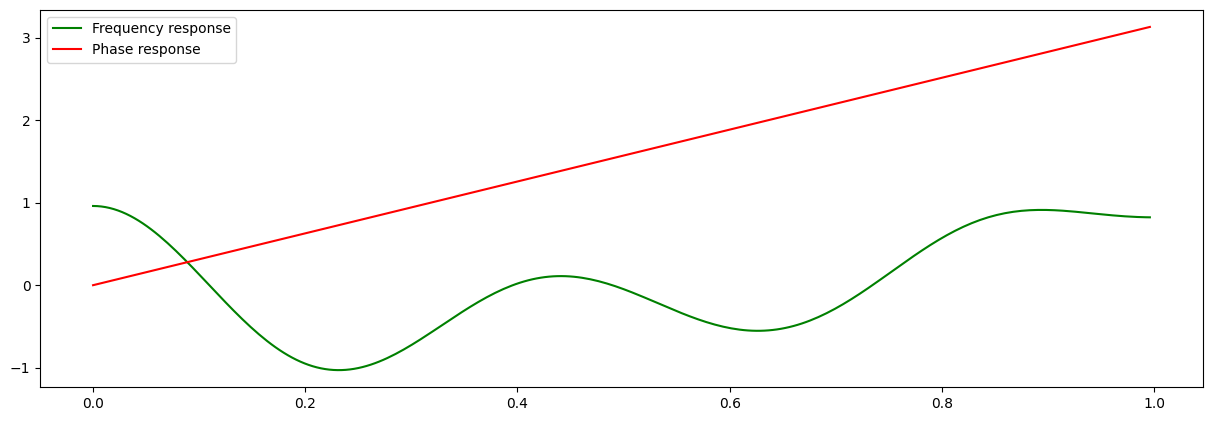

In [20]:
# calculating characteristics:

w, h = freqz(b, a, worN=256)

timestamps = np.arange(0, 1, 1/256)

plt.plot(timestamps, h, color='green', label='Frequency response')
plt.plot(timestamps, w, color='red', label='Phase response')
plt.legend()
plt.show()

# Task 11

In [21]:
from scipy.signal import lfilter, square

t = np.linspace(0, 1, 256, endpoint=False)
square = square(2 * np.pi * 5 * t, duty=0.3)
y = lfilter(b, a, square)


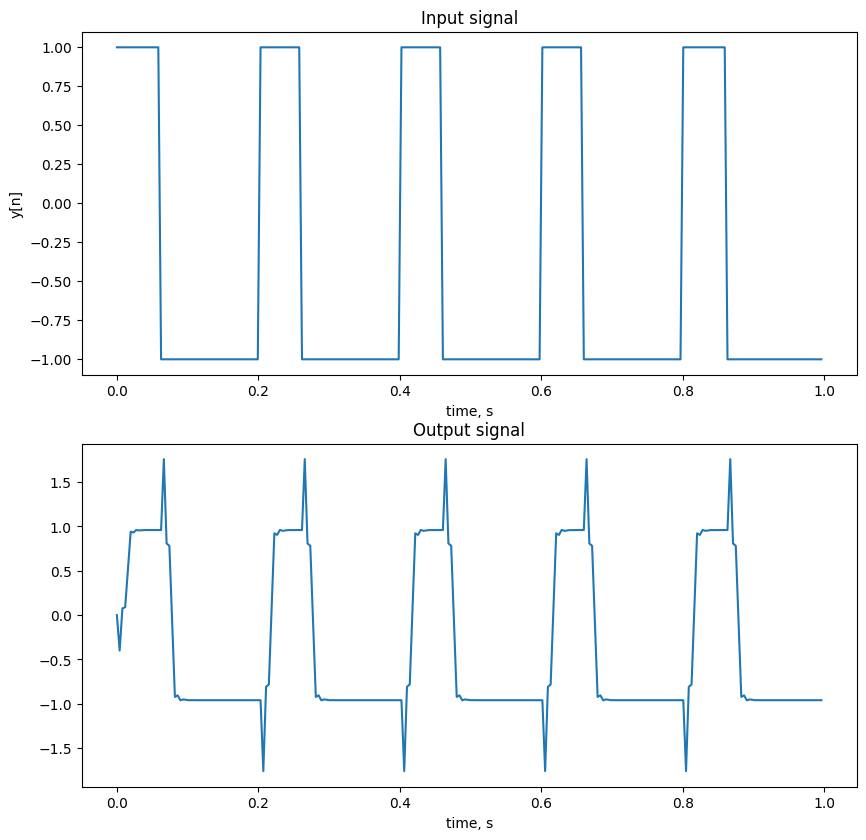

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(t, square)
ax1.set_title("Input signal")
ax1.set_xlabel("time, s")
ax1.set_ylabel("x[n]")

ax2.plot(t, y)
ax2.set_title("Output signal")
ax2.set_xlabel("time, s")
ax1.set_ylabel("y[n]")

plt.show()